# Plotting array data on a 3D Earth Model

In [1]:
import sys
import accessvis
import lavavu
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import xarray as xr

## Select our model resolution

This widget gives a quick way of choosing the level of detail to load, lower detail is faster and uses less memory but doesn't look as good, higher levels will be so slow to render that it will be difficult to interact with the model, best left for final renders.

The default parameter sets the initial choice [1-4]

In [2]:
accessvis.resolution_selection(default=1)

Low-res 2K - fast for testing
Mid-res 4K - good enough for full earth views
High res 8K - better if showing close up at country scale
Ultra-high 16K - max detail but requires a fast GPU with high memory


Dropdown(description='Detail:', options=(('Low-res 2K', 1), ('Mid-res 4K', 2), ('High-res 8K', 3), ('Ultra-hig…

## Create a simple earth relief plot

- See previous tutorial for details

In [3]:
lv = accessvis.plot_earth(texture='relief', background="white", vertical_exaggeration=20)

#Zoom out
lv.translation(0.0, 0.0, -17)
lv.rotation(0.0, -125.0, 0.0) #Rotate to Australia


In [4]:

#Update lighting
lv.set_properties(diffuse=0.8, ambient=0.1, specular=0.35, shininess=0.03, light=[1,1,0.98])

In [5]:
#Increase the colour saturation a bit
lv.brightness_contrast_saturation(0.5, 0.5, 0.65)


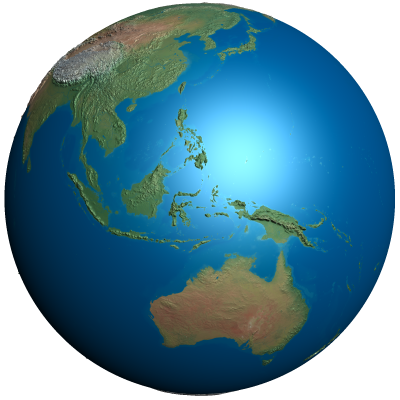

In [6]:
lv.display((400,400))

# Add data via numpy array

Load temperature data from a THREDDS server

In [7]:
thredds_server = "https://thredds.nci.org.au/thredds/dodsC/fs38/publications/"

#Temp at surf
ver = "CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/"
fpath = "r10i1p1f1/day/tas/gn/latest/tas_day_ACCESS-ESM1-5_historical_r10i1p1f1_gn_20000101-20141231.nc"
var = 'tas'
url = f"{thredds_server}{ver}{fpath}"

print(f'{url}.html')

ds = xr.open_dataset(url)

https://thredds.nci.org.au/thredds/dodsC/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/day/tas/gn/latest/tas_day_ACCESS-ESM1-5_historical_r10i1p1f1_gn_20000101-20141231.nc.html


In [8]:
data = ds[var]

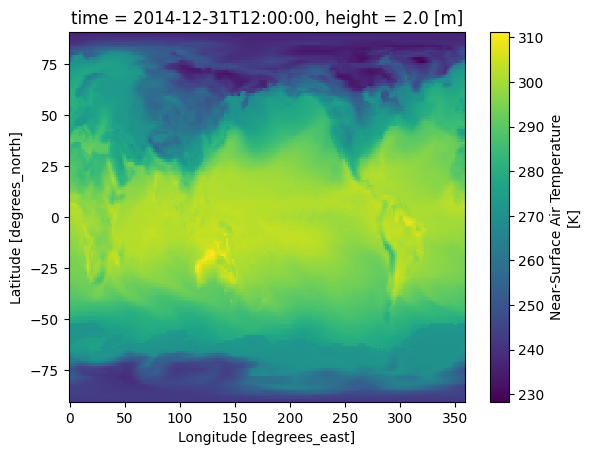

In [9]:
#data[0].plot() #First step
data[-1].plot() #Last step
arr = np.array(data[-1]) #Last step

In [10]:
colours = accessvis.array_to_rgba(arr, flip=True)

In [11]:
#Provide the texture data, set plot mode to everywhere, set opacity to 75% 
accessvis.update_earth_values(lv, dataMode=0, dataAlpha=0.75, data=colours)

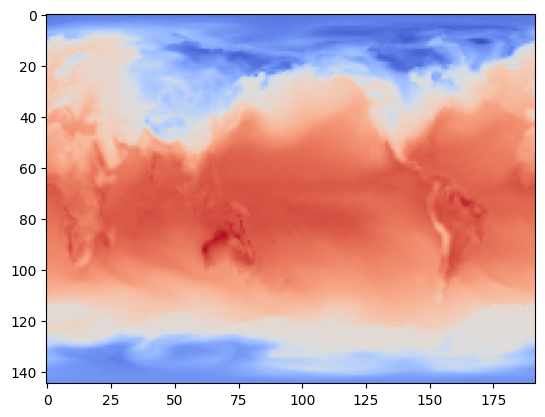

In [12]:
plt.imshow(colours)


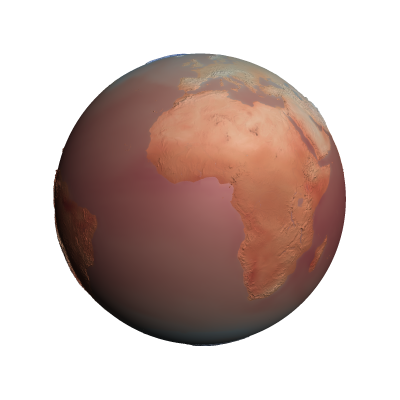

In [13]:
lv.reset()
lv.display((400,400))

In [ ]:
accessvis.update_earth_values(lv, dataMode=2, data=fn2, dataAlpha=0.75)
#accessvis.update_earth_values(lv, dataMode=0, data="tos_colours.png", dataAlpha=0.75)

In [ ]:
lv.reset()

In [ ]:
lv.display((400,400))

In [ ]:
#Redisplay at saved camera view

In [ ]:
lv.translation(0.397, -2.956, -10.1)
lv.rotation(-115.392, -20.62, 141.835)

In [ ]:
lv.display((400,400))

In [ ]:
#Enable bathymetry instead of ocean surface

In [ ]:
accessvis.update_earth_values(lv, ocean=[0.6, 0.6, 0.6, 1.0], bathymetry=True)

In [ ]:
lv.display((400,400))

In [ ]:
#Update lighting, disable specular highlights
lv.set_properties(diffuse=0.8, ambient=0.1, specular=0.0)
lv.display((400,400))

In [ ]:
#Load topography data and use as data instead of previously loaded temperature
arr = accessvis.load_topography(subsample=5)
plt.imshow(arr)

In [ ]:
#Rotate the texture 180 degrees
arr = np.roll(arr, arr.shape[1] // 2, axis=1)
plt.imshow(arr)

In [ ]:
img = Image.fromarray(get_rgba(arr))
display(img)
img.save('topo.png')

In [ ]:
#Replace the data with the topo/bathy array
accessvis.update_earth_values(lv, data="topo.png")
#Use the array data directly
#accessvis.update_earth_texture(lv, label="data", texture=arr)

In [ ]:
lv.display((400,400))

## Video output

In [ ]:
#With rotation
from tqdm.notebook import tqdm

#Reset view
lv.reset()
lv.translation(0, 0, -17.5)
lv.rotation(0.0, -125.0, 0.0) #Rotate to Australia

with lv.video(filename='earth_rotating.mp4', quality=3, resolution=(1024,1024), width=512, height=512, params="autoplay") as v:    
    for d in tqdm(range(0,90,1), desc='', miniters=1):
        lv.rotate('y', 1)
        lv.render()

    #Final frames - necessary or video playback is cut short
    for i in range(40):
        lv.render()